# Loading data and imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import ravel
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import seaborn as sns; sns.set_theme()

enem_df = pd.read_csv("MICRODADOS_ENEM_2019.csv",nrows=30000, encoding='latin-1', sep=';')
enem_df

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36,M,1,3,...,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23,M,1,1,...,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39,F,1,3,...,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25,F,1,1,...,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22,F,1,1,...,B,A,A,B,A,A,C,B,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,190001759586,2019,5208707,Goiânia,52,GO,18,F,1,3,...,B,A,A,B,A,A,C,A,B,B
29996,190001277486,2019,3154804,Rio Acima,31,MG,19,F,1,0,...,B,A,A,B,B,A,D,A,B,B
29997,190001443371,2019,2927408,Salvador,29,BA,25,F,1,1,...,A,A,A,B,A,A,C,A,B,A
29998,190001141152,2019,2301109,Aracati,23,CE,19,M,1,1,...,B,A,B,D,A,B,D,B,C,B


### Viewing where math grade has correlation > 0.3

In [2]:
enem_corr = enem_df.corr()

In [3]:
enem_corr[enem_corr["NU_NOTA_MT"].abs()>0.3]

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
NU_NOTA_CN,0.074634,NaN,0.100491,0.099506,-0.054436,-0.042468,-0.169297,-0.057653,0.103461,0.102420,...,0.641561,-0.238183,-0.074443,0.431600,0.412701,0.465185,0.439530,0.443486,0.504053,-0.080271
NU_NOTA_CH,0.081251,NaN,0.103901,0.102927,-0.027016,-0.026732,-0.175057,-0.061671,0.111866,0.110850,...,0.605912,-0.227895,-0.127727,0.465076,0.435813,0.486613,0.456689,0.470556,0.528922,-0.089132
NU_NOTA_LC,0.095870,NaN,0.122818,0.121710,-0.088269,-0.044745,-0.178635,-0.063939,0.131886,0.130665,...,0.584858,-0.250377,-0.137126,0.483900,0.434060,0.493064,0.453901,0.468876,0.532004,-0.100244
NU_NOTA_MT,0.076614,NaN,0.101144,0.100002,-0.141043,-0.053695,-0.180788,-0.042824,0.104835,0.103624,...,1.000000,-0.244274,-0.075386,0.443048,0.412299,0.466801,0.453761,0.443806,0.509221,-0.062924
NU_NOTA_COMP1,0.031903,NaN,0.043794,0.043296,-0.156025,-0.070357,-0.113601,-0.030241,0.051200,0.050562,...,0.443048,-0.150606,-0.566504,1.000000,0.674035,0.764240,0.800121,0.566791,0.835133,-0.034182
NU_NOTA_COMP2,0.003452,NaN,0.015880,0.015534,-0.156373,-0.064366,-0.083453,-0.024924,0.017863,0.017375,...,0.412299,-0.130317,-0.436925,0.674035,1.000000,0.847373,0.721580,0.655656,0.884575,-0.014968
NU_NOTA_COMP3,0.007425,NaN,0.016473,0.016179,-0.169949,-0.073575,-0.099368,-0.030532,0.020855,0.020446,...,0.466801,-0.145775,-0.439926,0.764240,0.847373,1.000000,0.800026,0.701646,0.928468,-0.021777
NU_NOTA_COMP4,-0.012472,NaN,-0.000222,-0.000375,-0.199315,-0.081329,-0.089482,-0.023172,0.005600,0.005300,...,0.453761,-0.134483,-0.483516,0.800121,0.721580,0.800026,1.000000,0.639853,0.883754,-0.013202
NU_NOTA_COMP5,0.000350,NaN,0.013739,0.013317,-0.186168,-0.062273,-0.091040,-0.035053,0.020991,0.020503,...,0.443806,-0.142756,-0.235845,0.566791,0.655656,0.701646,0.639853,1.000000,0.852176,-0.018822
NU_NOTA_REDACAO,0.005417,NaN,0.019073,0.018677,-0.199779,-0.079226,-0.107519,-0.033505,0.025271,0.024743,...,0.509221,-0.160439,-0.465526,0.835133,0.884575,0.928468,0.883754,0.852176,1.000000,-0.022726


### Choosing accordingly

In [4]:
enem_df = enem_df[["NU_NOTA_REDACAO","NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"]]
enem_df

,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,460.0,483.8,503.6,537.3,392.0,120.0,120.0,120.0,100.0,0.0
4,860.0,513.6,575.5,570.7,677.0,160.0,120.0,180.0,200.0,200.0
...,...,...,...,...,...,...,...,...,...,...
29995,860.0,576.1,632.9,562.2,602.9,160.0,200.0,160.0,180.0,160.0
29996,840.0,411.3,535.9,548.3,577.6,160.0,160.0,160.0,200.0,160.0
29997,920.0,566.3,575.3,566.4,453.0,160.0,200.0,180.0,180.0,200.0
29998,580.0,496.4,537.6,547.5,461.2,120.0,120.0,120.0,120.0,100.0


### Viewing heatmap from correlation

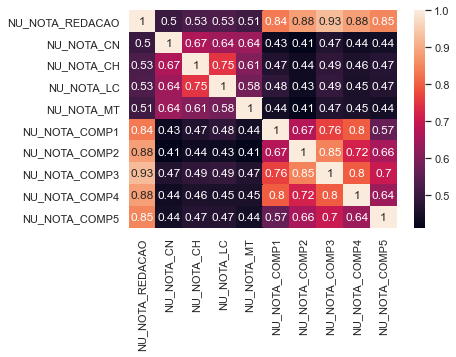

In [5]:
ax = sns.heatmap(enem_df.corr(),annot = True)

### Drop 0 values

In [6]:
mask1 = (enem_df["NU_NOTA_REDACAO"]==0)
mask2 = (enem_df["NU_NOTA_CN"]==0)
mask3 = (enem_df["NU_NOTA_LC"]==0)
mask4 = (enem_df["NU_NOTA_MT"]==0)
mask5 = (enem_df["NU_NOTA_COMP1"]==0)
mask6 = (enem_df["NU_NOTA_COMP2"]==0)
mask7 = (enem_df["NU_NOTA_COMP3"]==0)
mask8 = (enem_df["NU_NOTA_COMP4"]==0)
mask9 = (enem_df["NU_NOTA_COMP5"]==0)

enem_df = enem_df.loc[~mask1]
enem_df = enem_df.loc[~mask2]
enem_df = enem_df.loc[~mask3]
enem_df = enem_df.loc[~mask4]
enem_df = enem_df.loc[~mask5]
enem_df = enem_df.loc[~mask6]
enem_df = enem_df.loc[~mask7]
enem_df = enem_df.loc[~mask8]
enem_df = enem_df.loc[~mask8]

### Changing the null data to the mean and spliting the dataset

In [7]:
x = enem_df.drop(["NU_NOTA_MT"], axis=1)
y = enem_df.NU_NOTA_MT

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=0)

In [9]:
print(f"The train size is: {len(X_train)}")
print(f"The test size is: {len(X_test)}")

The train size is: 26496
The test size is: 2944


In [10]:
X_train = pd.DataFrame(X_train)
X_train.fillna(X_train.mean(),inplace=True)

In [11]:
X_test = pd.DataFrame(X_test)
X_test.fillna(X_test.mean(),inplace=True)

In [12]:
y_train = pd.DataFrame(y_train)
y_train.fillna(y_train.mean(),inplace=True)

In [13]:
y_test = pd.DataFrame(y_test)
y_test.fillna(y_test.mean(),inplace=True)

## Using Machine Learning Algorithms

### Linear regression: Attempts to model the relationship between two variables by fitting a linear equation to observed data. A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable.

### Decision tree: Builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

### Random forest: A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

### Gradient Boosting: Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

### In this case, we used the "regressor" type of theses models and MAE(Mean Absolute Error) to evoluate our model.

In [14]:
def models(Xtrain, ytrain, Xtest, ytest):
    linear_regression = LinearRegression()
    decision_tree = DecisionTreeRegressor()
    random_forest = RandomForestRegressor()
    gradient_boosting = GradientBoostingRegressor()
    
    list_models = [linear_regression,decision_tree,random_forest,gradient_boosting]
    models_str = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor", "Gradient Boosting Regressor"]
    
    for ml in range(4):
        fit = list_models[ml].fit(X_train, y_train.values.ravel())
        predict = fit.predict(X_test)
        print(f"{models_str[ml]}: {mean_absolute_error(predict, y_test)}\n")
    

In [15]:
models(X_train, y_train, X_test, y_test)

Linear Regression: 47.09838879003369

Decision Tree Regressor: 61.92841250933276

Random Forest Regressor: 48.31664281635125

Gradient Boosting Regressor: 47.41277645561932



In [16]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
#X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
#lm1.predict(X_new)
#["NU_NOTA_REDACAO","NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_COMP1","NU_NOTA_COMP2","NU_NOTA_COMP3","NU_NOTA_COMP4","NU_NOTA_COMP5"]